In [1]:
# Needed libraries for KNN:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.neighbors as knn

In [2]:
# Loading and analyzing the dataset.:

# Placeholder for dataset URL or file path
# Replace the following with the actual dataset URL or local file path

# Example of using a direct URL
# test_dataset = "https://www.kaggle.com/datasets/piyushkr101200/nn-assign1-2ddata?resource=download"

# Example of using a local file path
# test_dataset = "data//test.data"

file_path = "test.data"
data = pd.read_csv(file_path)

print(data.head(9))
print(data.describe())
print(data.shape)


FileNotFoundError: [Errno 2] No such file or directory: 'test.data'

In [ ]:
# Feature selection and pre-processing

features = data[['0.29166', '0.83188']]
print(features)

# Converting to a numpy array for sckit-learn

X = features.values
print(X)

Y = data[['1']].values

    0.29166   0.83188
0   0.93377  0.203970
1   0.32986 -0.492880
2   0.74076  0.746900
3  -0.98015  0.026801
4  -0.72598  0.465300
..      ...       ...
94 -0.13625  0.448120
95  0.26853 -0.436730
96  0.60605 -0.476360
97 -0.83224  0.416940
98  0.89093  0.567720

[99 rows x 2 columns]
[[ 0.93377    0.20397  ]
 [ 0.32986   -0.49288  ]
 [ 0.74076    0.7469   ]
 [-0.98015    0.026801 ]
 [-0.72598    0.4653   ]
 [ 0.63751   -0.15555  ]
 [-0.13967    0.92274  ]
 [ 0.78064   -0.85588  ]
 [ 0.46982    0.10682  ]
 [ 0.37465   -0.41603  ]
 [-0.30778    0.71593  ]
 [-0.66793   -0.32849  ]
 [-0.68877    0.36041  ]
 [-0.61777   -0.89311  ]
 [-0.1551    -0.28669  ]
 [ 0.71195   -0.0033908]
 [-0.0195    -0.13112  ]
 [ 0.63187    0.12492  ]
 [-0.07846    0.23324  ]
 [-0.085291  -0.77332  ]
 [-0.098622   0.7965   ]
 [-0.17556    0.5091   ]
 [ 0.80322    0.58225  ]
 [-0.98883    0.6299   ]
 [-0.40519    0.34001  ]
 [-0.90168   -0.59825  ]
 [ 0.38636   -0.45382  ]
 [ 0.30021    0.25247  ]
 [ 0.96598   

In [ ]:
# Test/Train Split Selection:

from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=4)

# The ravel() function is needed to convert the 2D numpy array for the Y target arrays into 1D which is required. This is NOT required for the feature arrays so they can remain at 2D.
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

print("The test size is: ", X_test.shape, Y_test.shape)
print("The training size is: ", X_train.shape, Y_train.shape)
 

The test size is:  (20, 2) (20,)
The training size is:  (79, 2) (79,)


In [ ]:
# Creating the KNN model and fitting it

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
'''
K = [1,2,3,4,5,6,7,8,9,10]

for j in K:

    k_neigh = KNeighborsClassifier(n_neighbors = K).fit(X_train, Y_train)
    Prediction = k_neigh.predict(X_test)
print(Prediction[0:5])
print("The training set accuracy is: ", metrics.accuracy_score(Y_train, k_neigh.predict(X_train)))
print("The testing set accuracy is: ", metrics.accuracy_score(Y_test, Prediction))
'''

K = 1
k_neigh = KNeighborsClassifier(n_neighbors = K).fit(X_train, Y_train)

# Model evaluation and prediction with test data

Prediction = k_neigh.predict(X_test)
print(Prediction[0:5])
print("The training set accuracy is: ", metrics.accuracy_score(Y_train, k_neigh.predict(X_train)))
print("The testing set accuracy is: ", metrics.accuracy_score(Y_test, Prediction))


[1 1 0 0 0]
The training set accuracy is:  1.0
The testing set accuracy is:  0.9


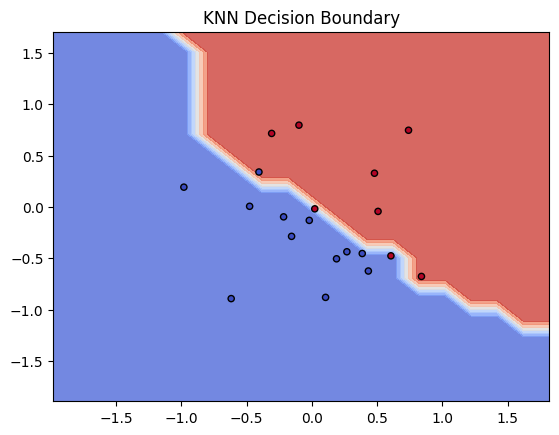

In [ ]:
# Plotting the KNN with matplotlib
def custom_plot(X, Y, model):
    h = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Fix to use X[:, 1] for y limits

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('KNN Decision Boundary')
    plt.show()

# Call the plot function
custom_plot(X_test, Y_test, k_neigh)
